## Lesson 10 recommended exercises

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [1]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-22/horror_movies.csv')
print(df.shape)
df.head()

(3328, 12)


,title,genres,release_date,release_country,movie_rating,review_rating,movie_run_time,plot,cast,language,filming_locations,budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000"
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN


In [3]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [5]:
df['release_year'] = df['release_date'].dt.year

In [7]:
q2_df = df[~df['budget'].isnull()]
q2_df.shape

(1234, 13)

In [12]:
q2_df = q2_df[q2_df['budget'].str[0] == '$']
q2_df.shape

(913, 13)

In [21]:
q2_df['budget_usd'] = q2_df['budget'].str[1:].str.replace(',', '').astype(int)

In [26]:
q2_agg_df = q2_df.groupby('release_year').agg(mean_budget=('budget_usd', 'mean')).reset_index().sort_values('release_year')

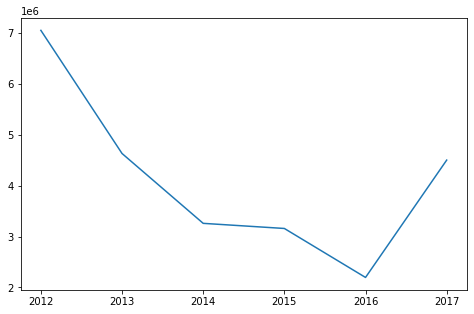

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(q2_agg_df['release_year'], q2_agg_df['mean_budget'])
plt.show()

In [29]:
q3_df = q2_df.copy()

In [30]:
q3_df.head()

,title,genres,release_date,release_country,movie_rating,review_rating,movie_run_time,plot,cast,language,filming_locations,budget,release_year,budget_usd
1,The Haunting of Mia Moss (2017),Horror,2017-01-13,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000",2017,30000
5,In Extremis (2017),Horror| Thriller,2017-01-01,UK,NaN,NaN,93 min,"Directed by Steve Stone. With David O'Hara, Is...",David O'Hara|Isabelle Allen|Neil Pearson|Toyah...,English,NaN,"$3,400,000",2017,3400000
11,Rise of the Animals (2011),Adventure| Comedy| Horror,2012-05-01,USA,NOT RATED,3.6,70 min,"Directed by Chris Wojcik. With Greg Hoople, St...",Greg Hoople|Stephanie Motta|Adam Schonberg|Nik...,English,"Rochester, New York, USA","$7,000",2012,7000
15,Circus of the Dead (2014),Action| Horror| Thriller,2017-01-13,USA,NaN,6.0,102 min,Directed by Billy 'Bloody Bill' Pon. With Bill...,Bill Oberst Jr.|Parrish Randall|Chanel Ryan|Ro...,English,"Odessa, Texas, USA","$150,000",2017,150000
18,Bad Behavior (2015),Horror,2015-10-27,USA,NaN,NaN,64 min,Directed by Curtis Everitt. With John Langston...,John Langston|Amelia Blue|Rex Roby|Peyton Hick...,English,"Pelahatchie, Mississippi, USA","$1,023",2015,1023


In [33]:
q3_df = q3_df[~q3_df['review_rating'].isnull()]
q3_df.shape

(847, 14)

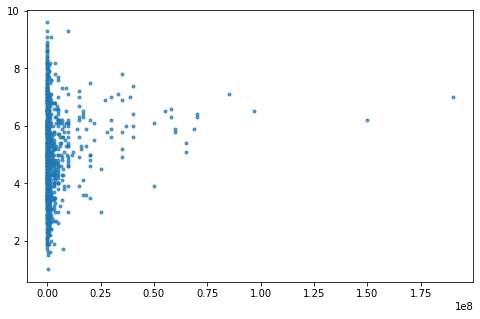

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(q3_df['budget_usd'], q3_df['review_rating'], s=9, alpha=.7)
plt.show()

In [36]:
q4_df = q3_df.copy()

In [41]:
q4_df = q4_df[~q4_df['movie_run_time'].isnull()]

In [43]:
q4_df['run_time_minutes'] = q4_df['movie_run_time'].str.replace(' min', '').astype(int)

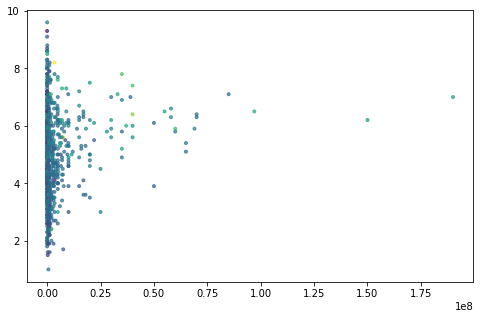

In [44]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(q4_df['budget_usd'], q4_df['review_rating'], s=9, alpha=.7,
           c=q4_df['run_time_minutes'])
plt.show()

In [45]:
df.head()

,title,genres,release_date,release_country,movie_rating,review_rating,movie_run_time,plot,cast,language,filming_locations,budget,release_year
0,Gut (2012),Drama| Horror| Thriller,2012-10-26,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN,2012
1,The Haunting of Mia Moss (2017),Horror,2017-01-13,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000",2017
2,Sleepwalking (2017),Horror,2017-10-21,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN,2017
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,2013-04-23,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN,2013
4,Infidus (2015),Crime| Drama| Horror,2015-04-10,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN,2015


In [57]:
top_languages = df['language'].value_counts()[:5].index.tolist()

In [58]:
q5_df = df[df['language'].isin(top_languages)]
q5_df.shape

(2665, 13)

In [59]:
q5_agg_df = (q5_df.groupby(['release_year', 'language']).
                agg(count=('title', 'count')).reset_index().sort_values('release_year'))

In [60]:
q5_agg_df.head()

,release_year,language,count
0,2012,English,250
1,2012,Hindi,4
2,2012,Japanese,13
3,2012,Spanish,12
4,2012,Thai,3


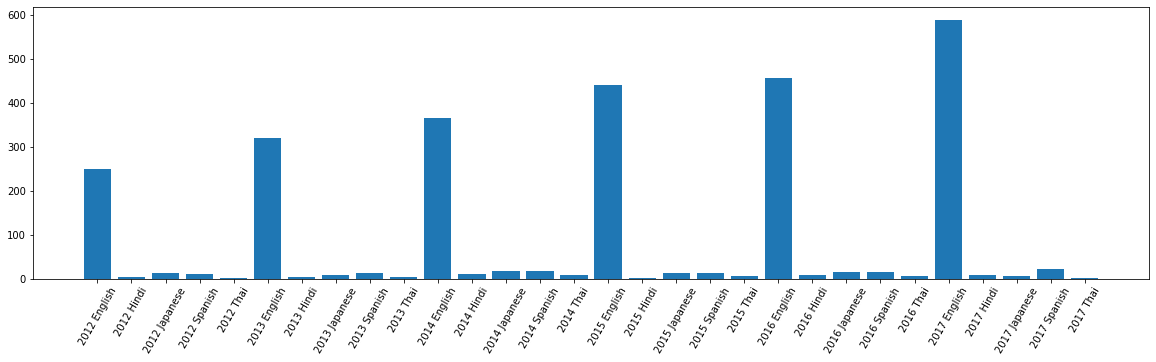

In [64]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(q5_agg_df.index, q5_agg_df['count'])
ax.set_xticks(q5_agg_df.index)
ax.set_xticklabels(q5_agg_df['release_year'].astype(str) + ' ' + q5_agg_df['language'], rotation=60)
plt.show()

<AxesSubplot:xlabel='release_year', ylabel='count'>

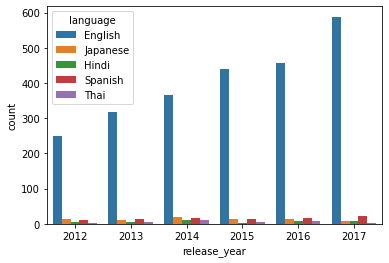

In [68]:
sns.countplot(data=q5_df, x='release_year', hue='language')

## Lesson 11 recommended exercises

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv')
print(df.shape)
df.head()

(1339, 43)


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


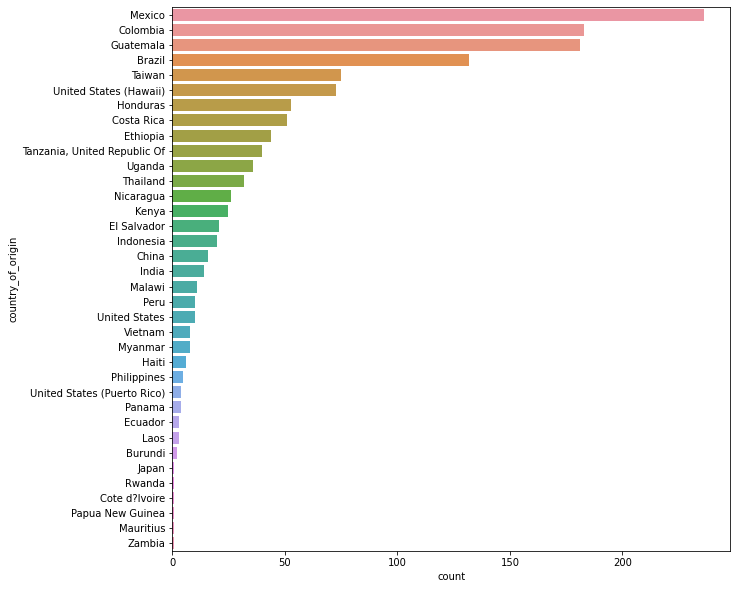

In [78]:
plt.subplots(figsize=(10, 10))
sns.countplot(data=df, y='country_of_origin', order=df['country_of_origin'].value_counts().index)
plt.show()

In [79]:
df.columns

Index(['total_cup_points', 'species', 'owner', 'country_of_origin',
       'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude',
       'region', 'producer', 'number_of_bags', 'bag_weight',
       'in_country_partner', 'harvest_year', 'grading_date', 'owner_1',
       'variety', 'processing_method', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

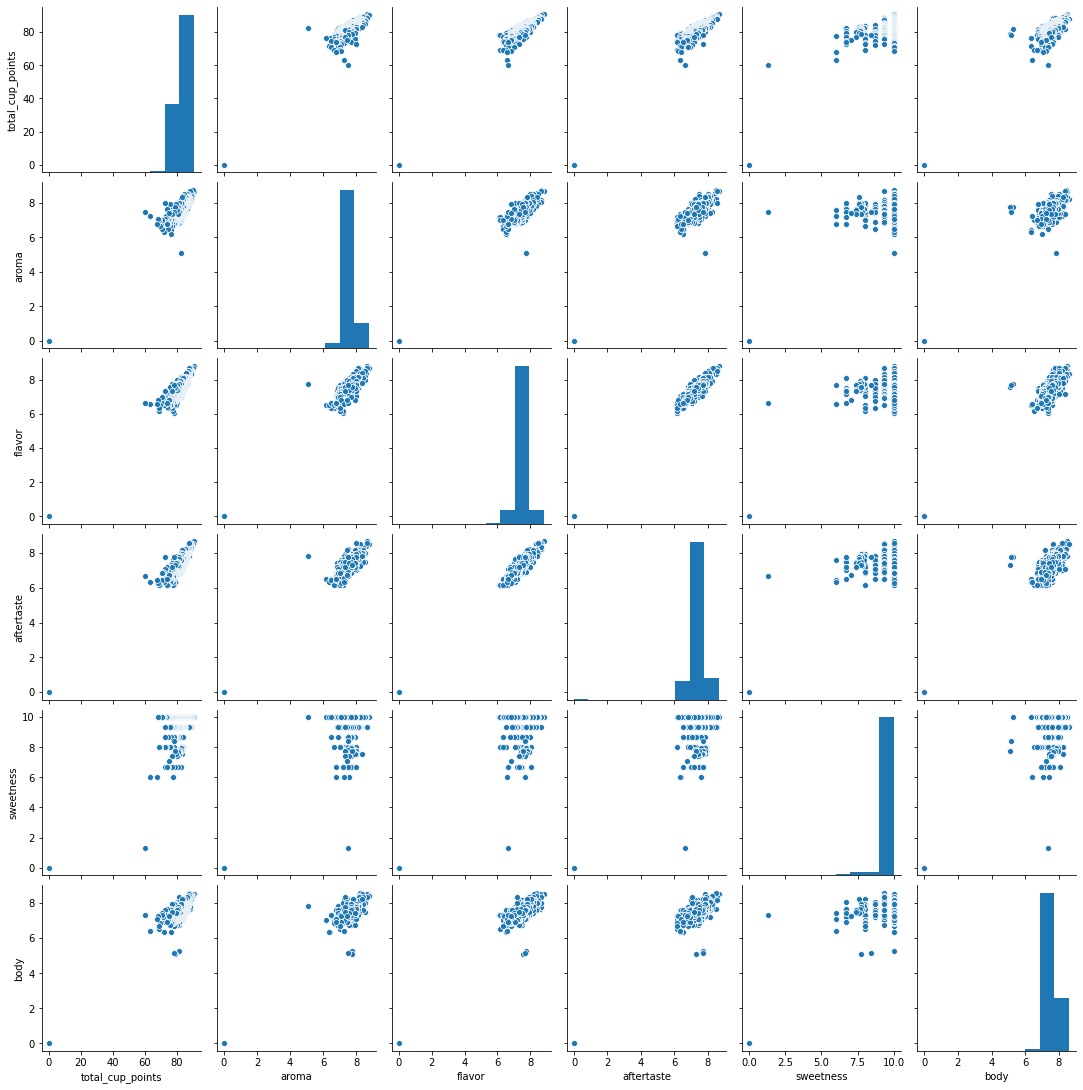

In [80]:
review_categories = [
    'total_cup_points', 'aroma', 'flavor', 'aftertaste', 'sweetness', 'body'
]

sns.pairplot(df[review_categories])

In [81]:
df['color'].value_counts()

Green           870
Bluish-Green    114
Blue-Green       85
None             52
Name: color, dtype: int64

In [89]:
q4_df = df[(~df['color'].isnull()) & (df['color'] != 'None')]
q4_df = q4_df[q4_df['total_cup_points'] >= np.percentile(q4_df['total_cup_points'], 1)]

In [90]:
q4_df['color'].value_counts()

Green           860
Bluish-Green    114
Blue-Green       84
Name: color, dtype: int64

<AxesSubplot:xlabel='color', ylabel='total_cup_points'>

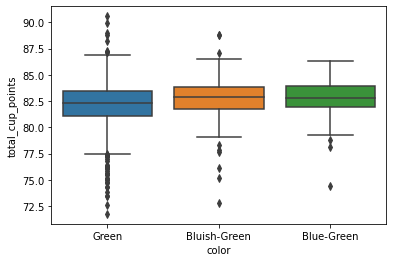

In [92]:
sns.boxplot(data=q4_df, x='color', y='total_cup_points')

In [93]:
q5_df = q4_df.copy()
q5_df = q5_df[q5_df['country_of_origin'].isin(q5_df['country_of_origin'].value_counts()[:10].index)]
q5_df.shape

(866, 43)

<AxesSubplot:xlabel='total_cup_points', ylabel='country_of_origin'>

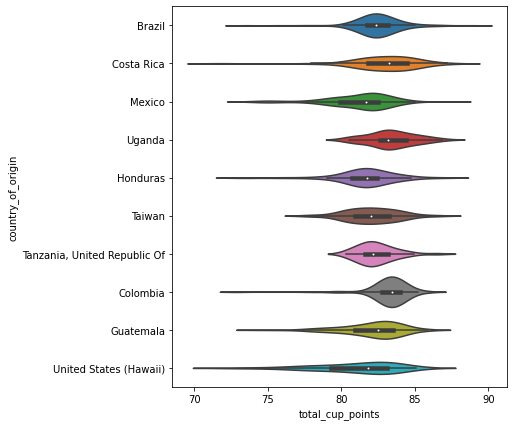

In [98]:
plt.subplots(figsize=(6, 7))
sns.violinplot(data=q5_df, y='country_of_origin', x='total_cup_points')

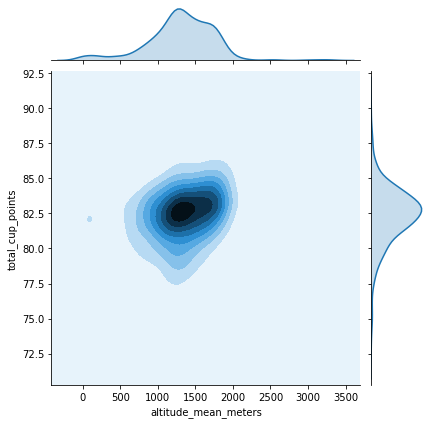

In [118]:
q6_df = df[~df['altitude_mean_meters'].isnull()]
q6_df = q6_df[(q6_df['total_cup_points'] >= np.percentile(q6_df['total_cup_points'], 1)) &
           (q6_df['altitude_mean_meters'] <= np.percentile(q6_df['altitude_mean_meters'], 99))]

sns.jointplot(q6_df['altitude_mean_meters'], q6_df['total_cup_points'], kind='kde')
plt.show()

## Lesson 13 recommended exercises

In [119]:
df = sns.load_dataset('diamonds')
print(df.shape)
df.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [120]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [121]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [122]:
from scipy.stats import chi2_contingency

In [128]:
X = (df.groupby(['cut', 'color']).
    agg(count=('carat', 'count')).reset_index().
     pivot(index='cut', columns='color', values='count')).values

In [129]:
chi2_contingency(X)

(310.31790052115434,
 1.394512091985105e-51,
 24,
 array([[ 202.22005933,  292.42065258,  284.80941787,  337.04338154,
          247.85761958,  161.83574342,   83.8131257 ],
        [ 616.2059696 ,  891.06566555,  867.87267334, 1027.04026696,
          755.27296997,  493.1466815 ,  255.39577308],
        [2706.85993697, 3914.25930664, 3812.37749351, 4511.56640712,
         3317.7512792 , 2166.28702262, 1121.89855395],
        [1732.18437152, 2504.82808676, 2439.63147942, 2887.05917686,
         2123.1083426 , 1386.25884316,  717.92969967],
        [1517.52966259, 2194.42628847, 2137.30893585, 2529.29076752,
         1860.00978865, 1214.47170931,  628.96284761]]))

In [130]:
from scipy.stats import f_oneway

In [133]:
f_oneway(*(df.groupby('cut').apply(lambda subdf: subdf['carat'].tolist()).values.tolist()))

F_onewayResult(statistic=495.6942592741633, pvalue=0.0)

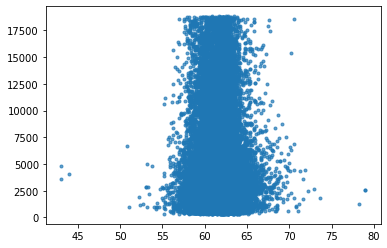

In [135]:
plt.scatter(df['depth'], df['price'], s=9, alpha=.7)
plt.show()

In [136]:
from scipy.stats import pearsonr

In [137]:
pearsonr(df['depth'], df['price'])

(-0.010647404584142987, 0.013403249011863443)

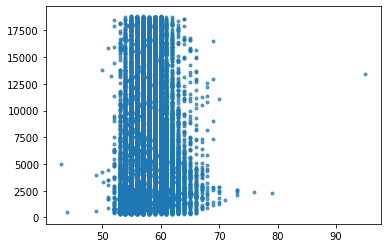

In [138]:
plt.scatter(df['table'], df['price'], s=9, alpha=.7)
plt.show()

In [139]:
pearsonr(df['table'], df['price'])

(0.1271339021217421, 3.7615339132592325e-193)